In [7]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\hp\anaconda3\lib\site-packages (2.2.2)



In [9]:
pip install scikit-learn==1.7.0

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
data = pd.read_csv('heart.csv')

In [23]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

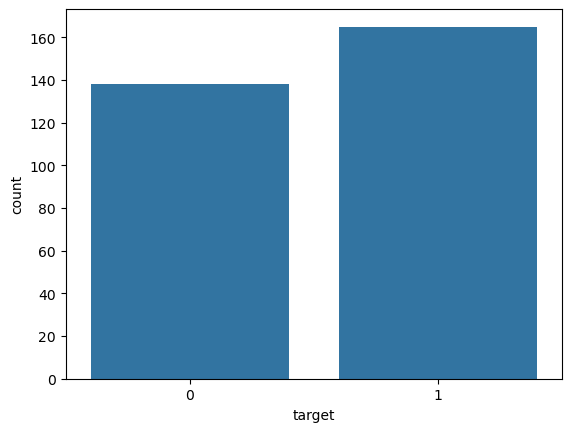

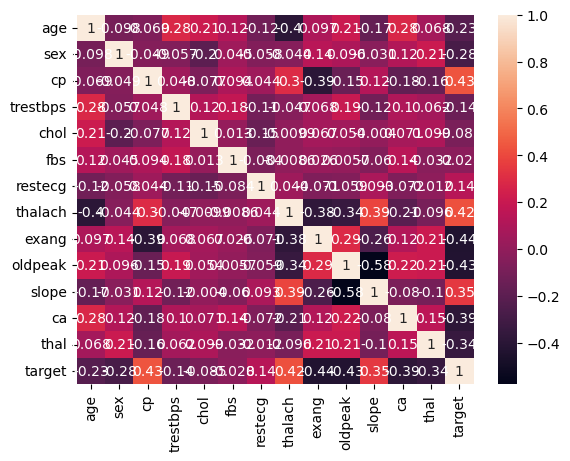

In [25]:
sns.countplot(x='target', data=data)
plt.show()

sns.heatmap(data.corr(), annot=True)
plt.show()

In [27]:
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
y_pred = model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8524590163934426
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8360655737704918


In [49]:
from sklearn.neighbors import KNeighborsClassifier

#KNN model
knn = KNeighborsClassifier(n_neighbors=5) 

#Train
knn.fit(X_train, y_train)

#Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("🔷 KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

🔷 KNN Results
Accuracy: 0.9180327868852459
[[27  2]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [47]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("🔷 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

🔷 Decision Tree Results
Accuracy: 0.7540983606557377
[[25  4]
 [11 21]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [51]:
from sklearn.svm import SVC

# SVM
svm = SVC(kernel='linear')

# Train
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("🔷 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

🔷 SVM Results
Accuracy: 0.8688524590163934
[[25  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [53]:
from sklearn.model_selection import GridSearchCV

In [55]:
# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Fit
grid_knn.fit(X_train, y_train)

print("🔹 Best KNN Parameters:", grid_knn.best_params_)
print("🔹 Best KNN Accuracy:", grid_knn.best_score_)

🔹 Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
🔹 Best KNN Accuracy: 0.8384353741496599


In [57]:
# Define parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

#GridSearchCV
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)

# Fit
grid_dt.fit(X_train, y_train)

print("🔹 Best Decision Tree Parameters:", grid_dt.best_params_)
print("🔹 Best Decision Tree Accuracy:", grid_dt.best_score_)

🔹 Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}
🔹 Best Decision Tree Accuracy: 0.7727891156462585


In [59]:
# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
# GridSearchCV
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

# Fit
grid_svm.fit(X_train, y_train)

print("🔹 Best SVM Parameters:", grid_svm.best_params_)
print("🔹 Best SVM Accuracy:", grid_svm.best_score_)

🔹 Best SVM Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
🔹 Best SVM Accuracy: 0.8182823129251702


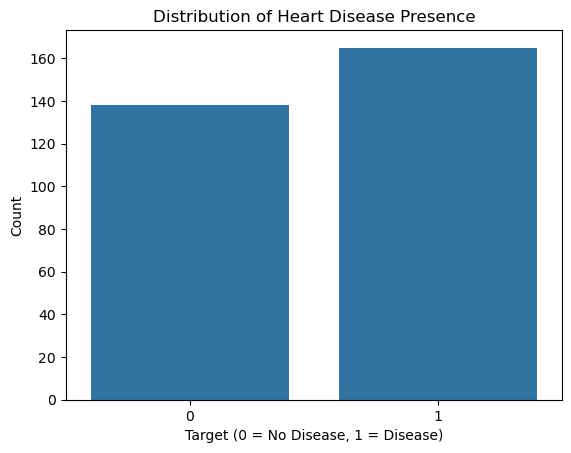

In [61]:
#Count plot of target value
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

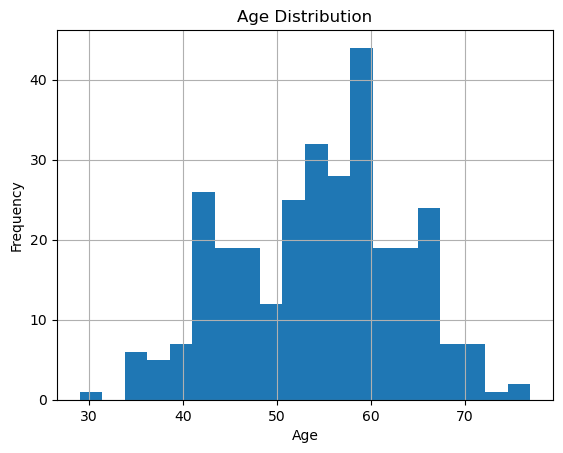

In [63]:
#The histrogram of age
data['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

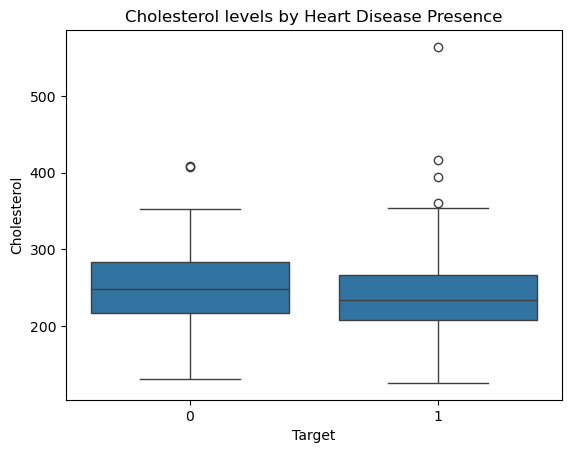

In [65]:
#Box plot of Cholesterol by Target
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol levels by Heart Disease Presence')
plt.xlabel('Target')
plt.ylabel('Cholesterol')
plt.show()

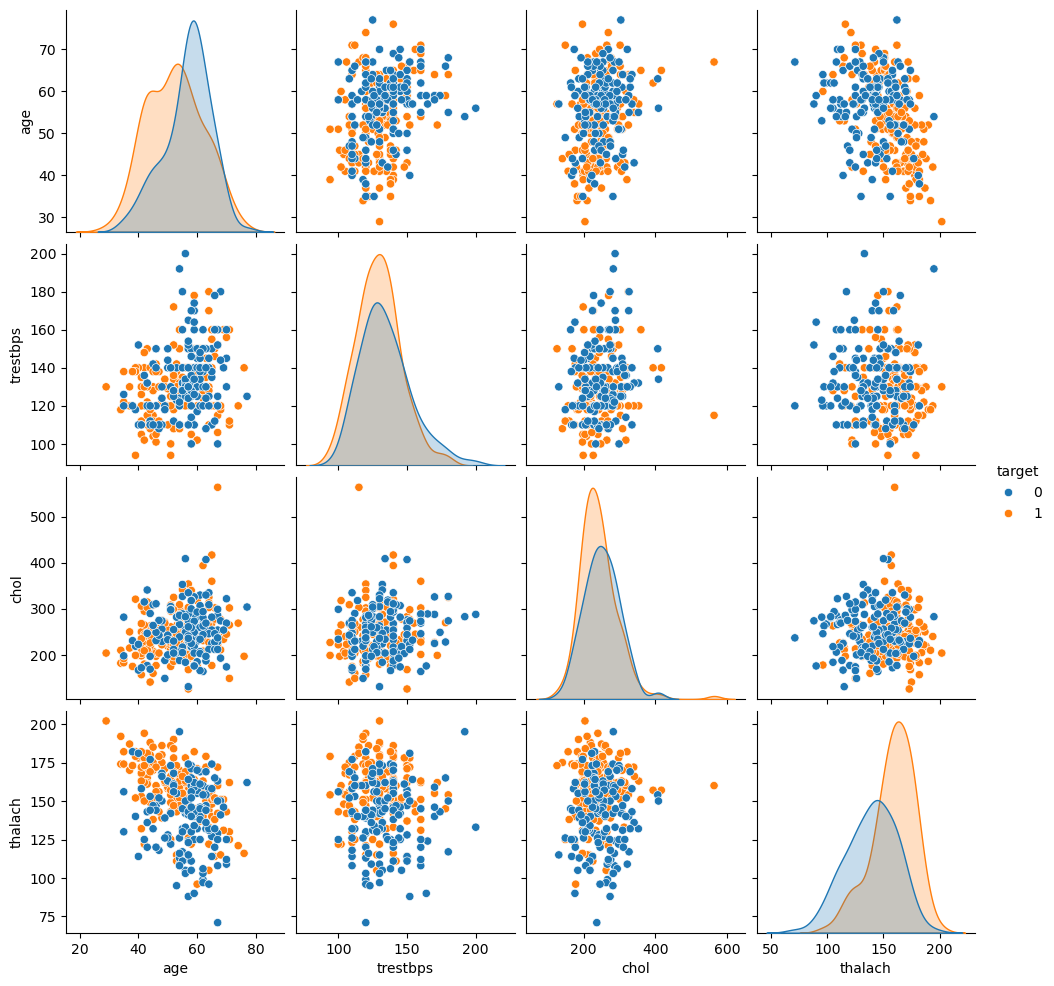

In [69]:
#Pairplot 
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(data[selected_features], hue='target')
plt.show()

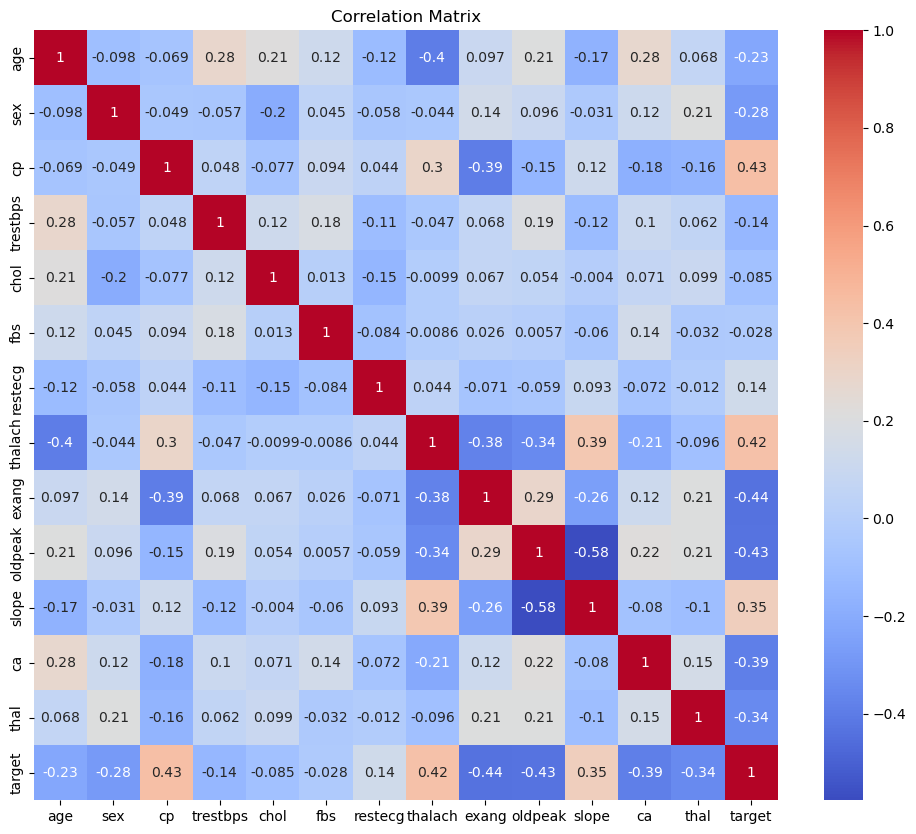

In [71]:
#Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

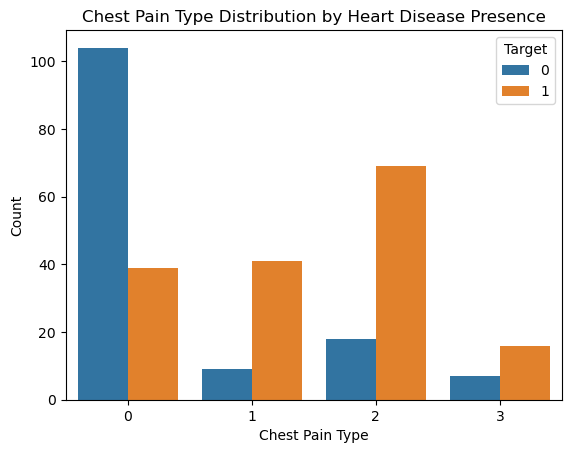

In [75]:
#Bar Plot of Chest Pain Types
sns.countplot(x='cp', hue='target', data=data)
plt.title('Chest Pain Type Distribution by Heart Disease Presence')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

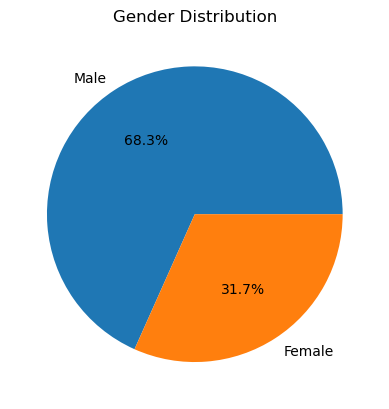

In [77]:
#Pie Chart of Gender
gender_counts = data['sex'].value_counts()
plt.pie(gender_counts, labels=['Male','Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15136\2642555516.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['target']==0]['age'], label='No Disease', shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15136\2642555516.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['target']==1]['age'], label='Disease', shade=True)


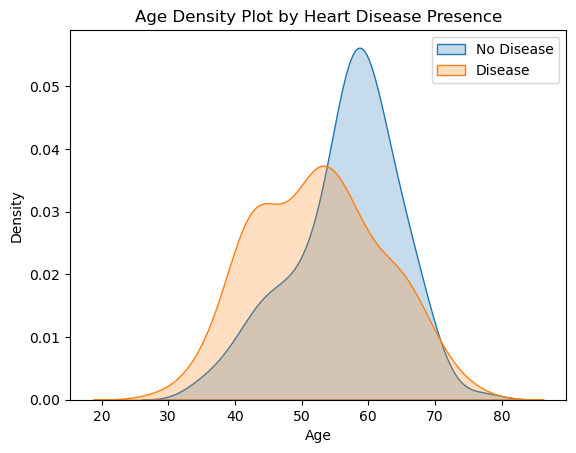

In [79]:
#KDE Plot (Density Plot) of Age by Target
sns.kdeplot(data=data[data['target']==0]['age'], label='No Disease', shade=True)
sns.kdeplot(data=data[data['target']==1]['age'], label='Disease', shade=True)
plt.title('Age Density Plot by Heart Disease Presence')
plt.xlabel('Age')
plt.legend()
plt.show()

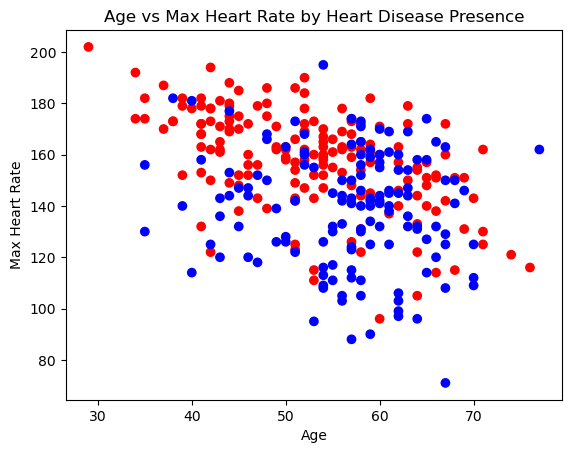

In [81]:
#Scatter Plot: Age vs Max Heart Rate
plt.scatter(data['age'], data['thalach'], c=data['target'], cmap='bwr')
plt.title('Age vs Max Heart Rate by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

In [83]:
import pickle

with open('heart_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [85]:
import os

print("Saved model path:", os.getcwd())

Saved model path: C:\Users\HP
